# Potential Baseball Awarded Player Prediction - Data Preprocessing

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
# importing data
master_df = pd.read_csv('../input/baseballdatabank-master/core/People.csv',usecols=['playerID','nameFirst','nameLast','bats','throws','debut','finalGame'])
fielding_df = pd.read_csv('../input/baseballdatabank-master/core/Fielding.csv',usecols=['playerID','yearID','stint','teamID','lgID','POS','G','GS','InnOuts','PO','A','E','DP'])
batting_df = pd.read_csv('../input/baseballdatabank-master/core/Batting.csv')
awards_df = pd.read_csv('../input/baseballdatabank-master/core/AwardsPlayers.csv', usecols=['playerID','awardID','yearID'])
allstar_df = pd.read_csv('../input/baseballdatabank-master/core/AllstarFull.csv', usecols=['playerID','yearID'])
hof_df = pd.read_csv('../input/baseballdatabank-master/core/HallOfFame.csv',usecols=['playerID','yearid','votedBy','needed_note','inducted','category'])
appearances_df = pd.read_csv('../input/baseballdatabank-master/core/Appearances.csv')
salary_df = pd.read_csv('../input/baseballdatabank-master/core/Salaries.csv')

In [3]:
# df size
batting_df.shape

(104324, 22)

In [4]:
# unique player ID
batting_df['playerID'].nunique()

19182

In [5]:
# Batting Table
# Initialize dictionaries for player stats and years played
player_stats = {}
years_played = {}

In [6]:
# print all the columns names
batting_df.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [7]:
# Create dictionaries for player stats and years played from `batting_df`
for i, row in batting_df.iterrows():
    playerID = row['playerID']
    if playerID in player_stats:
        player_stats[playerID]['G'] = player_stats[playerID]['G'] + row['G']
        player_stats[playerID]['AB'] = player_stats[playerID]['AB'] + row['AB']
        player_stats[playerID]['R'] = player_stats[playerID]['R'] + row['R']
        player_stats[playerID]['H'] = player_stats[playerID]['H'] + row['H']
        player_stats[playerID]['2B'] = player_stats[playerID]['2B'] + row['2B']
        player_stats[playerID]['3B'] = player_stats[playerID]['3B'] + row['3B']
        player_stats[playerID]['HR'] = player_stats[playerID]['HR'] + row['HR']
        player_stats[playerID]['RBI'] = player_stats[playerID]['RBI'] + row['RBI']
        player_stats[playerID]['SB'] = player_stats[playerID]['SB'] + row['SB']
        player_stats[playerID]['BB'] = player_stats[playerID]['BB'] + row['BB']
        player_stats[playerID]['SO'] = player_stats[playerID]['SO'] + row['SO']
        player_stats[playerID]['IBB'] = player_stats[playerID]['IBB'] + row['IBB']
        player_stats[playerID]['HBP'] = player_stats[playerID]['HBP'] + row['HBP']
        player_stats[playerID]['SH'] = player_stats[playerID]['SH'] + row['SH']
        player_stats[playerID]['SF'] = player_stats[playerID]['SF'] + row['SF']
        years_played[playerID].append(row['yearID'])
    else:
        player_stats[playerID] = {}
        player_stats[playerID]['G'] = row['G']
        player_stats[playerID]['AB'] = row['AB']
        player_stats[playerID]['R'] = row['R']
        player_stats[playerID]['H'] = row['H']
        player_stats[playerID]['2B'] = row['2B']
        player_stats[playerID]['3B'] = row['3B']
        player_stats[playerID]['HR'] = row['HR']
        player_stats[playerID]['RBI'] = row['RBI']
        player_stats[playerID]['SB'] = row['SB']
        player_stats[playerID]['BB'] = row['BB']
        player_stats[playerID]['SO'] = row['SO']
        player_stats[playerID]['IBB'] = row['IBB']
        player_stats[playerID]['HBP'] = row['HBP']
        player_stats[playerID]['SH'] = row['SH']
        player_stats[playerID]['SF'] = row['SF']
        years_played[playerID] = []
        years_played[playerID].append(row['yearID'])

In [8]:
# Iterate through `years_played` and add the number of years played to `player_stats`
for k, v in years_played.items():
    player_stats[k]['Years_Played'] = len(list(set(v)))

In [9]:
# Add fielding stats to `player_stats` from `fielding_df`
salary_list = []
salary_year = {}
for i, row in salary_df.iterrows():
    playerID = row['playerID']
    salary = row['salary']

    if playerID in player_stats and playerID in salary_list:
        player_stats[playerID]['salary'] = player_stats[playerID]['salary'] + salary
        salary_year[playerID].append(row['yearID'])

    else:
        salary_list.append(playerID)
        player_stats[playerID]['salary'] = salary
        salary_year[playerID] = []
        salary_year[playerID].append(row['yearID'])

for k, v in salary_year.items():
    player_stats[k]['salary_year'] = len(list(set(v)))

In [10]:
# Fielding Table
# # Initialize `fielder_list`
fielder_list = []

# Add fielding stats to `player_stats` from `fielding_df`
for i, row in fielding_df.iterrows():
    playerID = row['playerID']
    Gf = row['G']
    GSf = row['GS']
    POf = row['PO']
    Af = row['A']
    Ef = row['E']
    DPf = row['DP']
    if playerID in player_stats and playerID in fielder_list:
        player_stats[playerID]['Gf'] = player_stats[playerID]['Gf'] + Gf
        player_stats[playerID]['GSf'] = player_stats[playerID]['GSf'] + GSf
        player_stats[playerID]['POf'] = player_stats[playerID]['POf'] + POf
        player_stats[playerID]['Af'] = player_stats[playerID]['Af'] + Af
        player_stats[playerID]['Ef'] = player_stats[playerID]['Ef'] + Ef
        player_stats[playerID]['DPf'] = player_stats[playerID]['DPf'] + DPf
    else:
        fielder_list.append(playerID)
        player_stats[playerID]['Gf'] = Gf
        player_stats[playerID]['GSf'] = GSf
        player_stats[playerID]['POf'] = POf
        player_stats[playerID]['Af'] = Af
        player_stats[playerID]['Ef'] = Ef
        player_stats[playerID]['DPf'] = DPf

In [11]:
# Award Table
print(awards_df['awardID'].unique())
print(len(awards_df['awardID'].unique()))

['Pitching Triple Crown' 'Triple Crown' 'Baseball Magazine All-Star'
 'Most Valuable Player' 'TSN All-Star' 'TSN Guide MVP'
 'TSN Major League Player of the Year' 'TSN Pitcher of the Year'
 'TSN Player of the Year' 'Rookie of the Year' 'Babe Ruth Award'
 'Lou Gehrig Memorial Award' 'World Series MVP' 'Cy Young Award'
 'Gold Glove' 'TSN Fireman of the Year' 'All-Star Game MVP' 'Hutch Award'
 'Roberto Clemente Award' 'Rolaids Relief Man Award' 'NLCS MVP' 'ALCS MVP'
 'Silver Slugger' 'Branch Rickey Award' 'Hank Aaron Award'
 'TSN Reliever of the Year' 'Comeback Player of the Year'
 'Outstanding DH Award' 'Reliever of the Year Award']
29


In [12]:
# Create DataFrames for each award - consider only the important awards
mvp = awards_df[awards_df['awardID'] == 'Most Valuable Player']
roy = awards_df[awards_df['awardID'] == 'Rookie of the Year']
gg = awards_df[awards_df['awardID'] == 'Gold Glove']
ss = awards_df[awards_df['awardID'] == 'Silver Slugger']
ws_mvp = awards_df[awards_df['awardID'] == 'World Series MVP']

bmas = awards_df[awards_df['awardID'] == 'Baseball Magazine All-Star']
tsn = awards_df[awards_df['awardID'] == 'TSN All-Star']
tsnp = awards_df[awards_df['awardID'] == 'TSN Pitcher of the Year']
cya = awards_df[awards_df['awardID'] == 'Cy Young Award']
tsnm = awards_df[awards_df['awardID'] == 'TSN Major League Player of the Year']
braa = awards_df[awards_df['awardID'] == 'Babe Ruth Award']
asgm = awards_df[awards_df['awardID'] == 'All-Star Game MVP']
lgma = awards_df[awards_df['awardID'] == 'Lou Gehrig Memorial Award']
rcw = awards_df[awards_df['awardID'] == 'Roberto Clemente Awardr']
haa = awards_df[awards_df['awardID'] == 'Hutch Award']
alcsm = awards_df[awards_df['awardID'] == 'ALCS MVP']
tsng = awards_df[awards_df['awardID'] == 'TSN Guide MVPd']
bra = awards_df[awards_df['awardID'] == 'Branch Rickey Award']
tcc = awards_df[awards_df['awardID'] == 'Triple Crown']
oda = awards_df[awards_df['awardID'] == 'Outstanding DH Award']


# Include each DataFrame in `awards_list`
awards_list = [mvp,roy,gg,ss,ws_mvp,bmas,tsn,tsnp,cya,tsnm,braa,asgm,lgma,rcw,haa,alcsm,tsng,
              bra,tcc,oda]

# Initialize lists for each of the above DataFrames
mvp_list = []
roy_list = []
gg_list = []
ss_list = []
ws_mvp_list = []
bmas_list = []
tsn_list = []
tsnp_list = []
cya_list = []
tsnm_list = []
braa_list = []
asgm_list = []
lgma_list = []
rcw_list = []
haa_list = []
alcsm_list = []
tsng_list = []
bra_list = []
tcc_list = []
oda_list = []


# Include each of the above lists in `lists`
lists = [mvp_list,roy_list,gg_list,ss_list,ws_mvp_list,bmas_list,tsn_list,tsnp_list,
        cya_list,tsnm_list,braa_list,asgm_list,lgma_list,rcw_list,haa_list,alcsm_list,
        tsng_list,bra_list,tcc_list,oda_list]

In [13]:
# Add a count for each award for each player in `player_stats`
for index, v in enumerate(awards_list):
    for i, row in v.iterrows():
        playerID = row['playerID']
        award = row['awardID']
        if playerID in player_stats and playerID in lists[index]:
            player_stats[playerID][award] += 1
        else:
            lists[index].append(playerID)
            player_stats[playerID][award] = 1

In [14]:
# Allstar Table
# Initialize `allstar_list`
allstar_list = []

# Add a count for each Allstar game appearance for each player in `player_stats`
for i, row in allstar_df.iterrows():
    playerID = row['playerID']
    if playerID in player_stats and playerID in allstar_list:
        player_stats[playerID]['AS_games'] += 1
    else:
        allstar_list.append(playerID)
        player_stats[playerID]['AS_games'] = 1

In [15]:
# Hall Of Fame Table
# filter `hof_df` to include only instances where a player was inducted into the Hall of Fame
hof_df = hof_df[(hof_df['inducted'] == 'Y') & (hof_df['category'] == 'Player')]

# Indicate which players in `player_stats` were inducted into the Hall of Fame
for i, row in hof_df.iterrows():
    playerID = row['playerID']
    if playerID in player_stats:
        player_stats[playerID]['HoF'] = 1
        player_stats[playerID]['votedBy'] = row['votedBy']

In [16]:
# convert dictionary to dataframe
# Convert `player_stats` into a DataFrame
stats_df = pd.DataFrame.from_dict(player_stats, orient='index')

In [17]:
# showing first 10 rows of processed dataframe
stats_df.head(10)

,G,AB,R,H,2B,3B,HR,RBI,SB,BB,...,Rookie of the Year,World Series MVP,Hutch Award,All-Star Game MVP,Branch Rickey Award,salary,salary_year,Silver Slugger,ALCS MVP,Outstanding DH Award
aardsda01,331,4,0,0,0,0,0,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,9259750.0,7.0,NaN,NaN,NaN
aaronha01,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aaronto01,437,944,102,216,42,6,13,94.0,9.0,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aasedo01,448,5,0,0,0,0,0,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,2300000.0,4.0,NaN,NaN,NaN
abadan01,15,21,1,2,0,0,0,0.0,0.0,4,...,NaN,NaN,NaN,NaN,NaN,327000.0,1.0,NaN,NaN,NaN
abadfe01,363,9,0,1,0,0,0,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,3766400.0,5.0,NaN,NaN,NaN
abadijo01,12,49,4,11,0,0,0,5.0,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abbated01,855,3044,355,772,99,43,11,324.0,142.0,289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abbeybe01,79,225,21,38,3,3,0,17.0,3.0,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abbeych01,452,1756,307,493,67,46,19,280.0,93.0,167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# joining stats_df with master file
# Add a column for playerID from the `stats_df` index
stats_df['playerID'] = stats_df.index

# Join `stats_df` and `master_df`
master_df = master_df.join(stats_df,on='playerID',how='inner', rsuffix='mstr')

In [19]:
# Initialize a dictionary
pos_dict = {}

# Iterate through `appearances_df`
# Add a count for the number of appearances for each player at each position
# Also add a count for the number of games played for each player in each era.
for i, row in appearances_df.iterrows():
    ID = row['playerID']
    year = row['yearID']
    if ID in pos_dict:
        pos_dict[ID]['G_all'] = pos_dict[ID]['G_all'] + row['G_all']
        pos_dict[ID]['G_p'] = pos_dict[ID]['G_p'] + row['G_p']
        pos_dict[ID]['G_c'] = pos_dict[ID]['G_c'] + row['G_c']
        pos_dict[ID]['G_1b'] = pos_dict[ID]['G_1b'] + row['G_1b']
        pos_dict[ID]['G_2b'] = pos_dict[ID]['G_2b'] + row['G_2b']
        pos_dict[ID]['G_3b'] = pos_dict[ID]['G_3b'] + row['G_3b']
        pos_dict[ID]['G_ss'] = pos_dict[ID]['G_ss'] + row['G_ss']
        pos_dict[ID]['G_lf'] = pos_dict[ID]['G_lf'] + row['G_lf']
        pos_dict[ID]['G_cf'] = pos_dict[ID]['G_cf'] + row['G_cf']
        pos_dict[ID]['G_rf'] = pos_dict[ID]['G_rf'] + row['G_rf']
        pos_dict[ID]['G_of'] = pos_dict[ID]['G_of'] + row['G_of']
        pos_dict[ID]['G_dh'] = pos_dict[ID]['G_dh'] + row['G_dh']
        if year < 1920:
            pos_dict[ID]['pre1920'] = pos_dict[ID]['pre1920'] + row['G_all']
        elif year >= 1920 and year <= 1941:
            pos_dict[ID]['1920-41'] = pos_dict[ID]['1920-41'] + row['G_all']
        elif year >= 1942 and year <= 1945:
            pos_dict[ID]['1942-45'] = pos_dict[ID]['1942-45'] + row['G_all']
        elif year >= 1946 and year <= 1962:
            pos_dict[ID]['1946-62'] = pos_dict[ID]['1946-62'] + row['G_all']
        elif year >= 1963 and year <= 1976:
            pos_dict[ID]['1963-76'] = pos_dict[ID]['1963-76'] + row['G_all']
        elif year >= 1977 and year <= 1992:
            pos_dict[ID]['1977-92'] = pos_dict[ID]['1977-92'] + row['G_all']
        elif year >= 1993 and year <= 2009:
            pos_dict[ID]['1993-2009'] = pos_dict[ID]['1993-2009'] + row['G_all']
        elif year > 2009:
            pos_dict[ID]['post2009'] = pos_dict[ID]['post2009'] + row['G_all']
    else:
        pos_dict[ID] = {}
        pos_dict[ID]['G_all'] = row['G_all']
        pos_dict[ID]['G_p'] = row['G_p']
        pos_dict[ID]['G_c'] = row['G_c']
        pos_dict[ID]['G_1b'] = row['G_1b']
        pos_dict[ID]['G_2b'] = row['G_2b']
        pos_dict[ID]['G_3b'] = row['G_3b']
        pos_dict[ID]['G_ss'] = row['G_ss']
        pos_dict[ID]['G_lf'] = row['G_lf']
        pos_dict[ID]['G_cf'] = row['G_cf']
        pos_dict[ID]['G_rf'] = row['G_rf']
        pos_dict[ID]['G_of'] = row['G_of']
        pos_dict[ID]['G_dh'] = row['G_dh']
        pos_dict[ID]['pre1920'] = 0
        pos_dict[ID]['1920-41'] = 0
        pos_dict[ID]['1942-45'] = 0
        pos_dict[ID]['1946-62'] = 0
        pos_dict[ID]['1963-76'] = 0
        pos_dict[ID]['1977-92'] = 0
        pos_dict[ID]['1993-2009'] = 0
        pos_dict[ID]['post2009'] = 0
        if year < 1920:
            pos_dict[ID]['pre1920'] = row['G_all']
        elif year >= 1920 and year <= 1941:
            pos_dict[ID]['1920-41'] = row['G_all']
        elif year >= 1942 and year <= 1945:
            pos_dict[ID]['1942-45'] = row['G_all']
        elif year >= 1946 and year <= 1962:
            pos_dict[ID]['1946-62'] = row['G_all']
        elif year >= 1963 and year <= 1976:
            pos_dict[ID]['1963-76'] = row['G_all']
        elif year >= 1977 and year <= 1992:
            pos_dict[ID]['1977-92'] = row['G_all']
        elif year >= 1993 and year <= 2009:
            pos_dict[ID]['1993-2009'] = row['G_all']
        elif year > 2009:
            pos_dict[ID]['post2009'] = row['G_all']

In [20]:
# Convert the `pos_dict` to a DataFrame
pos_df = pd.DataFrame.from_dict(pos_dict, orient='index')

In [21]:
# Next you want to determine the percentage of times each player played at each position and within each era.
# Create a list from the columns of `pos_df`
pos_col_list = pos_df.columns.tolist()

# Remove the string 'G_all'
pos_col_list.remove('G_all')

# Loop through the list and divide each column by the players total games played
for col in pos_col_list:
    column = col + '_percent'
    pos_df[column] = pos_df[col] / pos_df['G_all']

In [22]:
# Join `pos_df` and `master_df`
master_df = master_df.join(pos_df,on='playerID',how='right')

# Print out the first rows of `master_df`
print(master_df.head())

    playerID nameFirst nameLast bats throws       debut   finalGame     G  \
0  aardsda01     David  Aardsma    R      R  2004-04-06  2015-08-23   331   
1  aaronha01      Hank    Aaron    R      R  1954-04-13  1976-10-03  3298   
2  aaronto01    Tommie    Aaron    R      R  1962-04-10  1971-09-26   437   
3   aasedo01       Don     Aase    R      R  1977-07-26  1990-10-03   448   
4   abadan01      Andy     Abad    L      L  2001-09-10  2006-04-13    15   

      AB     R        ...         G_of_percent  G_dh_percent  pre1920_percent  \
0      4     0        ...             0.000000      0.000000              0.0   
1  12364  2174        ...             0.836871      0.060946              0.0   
2    944   102        ...             0.313501      0.000000              0.0   
3      5     0        ...             0.000000      0.000000              0.0   
4     21     1        ...             0.066667      0.000000              0.0   

   1920-41_percent  1942-45_percent  1946-62_perce

In [23]:
# Replace NA values with `None`
master_df['votedBy'] = master_df['votedBy'].fillna('None')

# Filter `master_df` to include only players who were voted into the Hall of Fame or Players who did not make it at all
master_df = master_df[(master_df['votedBy'] == 'None') | (master_df['votedBy'] == 'BBWAA') | (master_df['votedBy'] == 'Run Off')]

# Inspect `master_df`
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19078 entries, 0 to 19369
Data columns (total 92 columns):
playerID                               19078 non-null object
nameFirst                              19040 non-null object
nameLast                               19078 non-null object
bats                                   18000 non-null object
throws                                 18205 non-null object
debut                                  19069 non-null object
finalGame                              19069 non-null object
G                                      19078 non-null int64
AB                                     19078 non-null int64
R                                      19078 non-null int64
H                                      19078 non-null int64
2B                                     19078 non-null int64
3B                                     19078 non-null int64
HR                                     19078 non-null int64
RBI                                    18556

In [24]:
# Create a function to convert the bats and throws colums to numeric
def bats_throws(col):
    if col == "R":
        return 1
    else:
        return 0

# Use the `apply()` method to create numeric columns from the bats and throws columns
master_df['bats_R'] = master_df['bats'].apply(bats_throws)
master_df['throws_R'] = master_df['throws'].apply(bats_throws)

# Print out the first rows of `master_df`
print(master_df.head())

    playerID nameFirst nameLast bats throws       debut   finalGame     G  \
0  aardsda01     David  Aardsma    R      R  2004-04-06  2015-08-23   331   
1  aaronha01      Hank    Aaron    R      R  1954-04-13  1976-10-03  3298   
2  aaronto01    Tommie    Aaron    R      R  1962-04-10  1971-09-26   437   
3   aasedo01       Don     Aase    R      R  1977-07-26  1990-10-03   448   
4   abadan01      Andy     Abad    L      L  2001-09-10  2006-04-13    15   

      AB     R    ...     pre1920_percent  1920-41_percent  1942-45_percent  \
0      4     0    ...                 0.0              0.0              0.0   
1  12364  2174    ...                 0.0              0.0              0.0   
2    944   102    ...                 0.0              0.0              0.0   
3      5     0    ...                 0.0              0.0              0.0   
4     21     1    ...                 0.0              0.0              0.0   

   1946-62_percent  1963-76_percent  1977-92_percent  1993-200

In [25]:
# extracting time
# Import datetime 
from datetime import datetime

# Convert the `debut` column to datetime
master_df['debut'] =  pd.to_datetime(master_df['debut'])
# Convert the `finalGame` column to datetime
master_df['finalGame'] = pd.to_datetime(master_df['finalGame'])

# Create new columns for debutYear and finalYear
master_df['debutYear'] = pd.to_numeric(master_df['debut'].dt.strftime('%Y'), errors='coerce')
master_df['finalYear'] = pd.to_numeric(master_df['finalGame'].dt.strftime('%Y'), errors='coerce')

In [26]:
# Eliminating unnecessary columns
df = master_df.drop(['votedBy', 'IBB', 'bats', 'throws', 'GSf', 'POf','Gf', 'playerIDmstr'], axis=1)

# Print `df` columns 
print(df.columns)
print(len(df.columns))

# Print a list of null values
print(df.isnull().sum(axis=0).tolist())

Index(['playerID', 'nameFirst', 'nameLast', 'debut', 'finalGame', 'G', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 'HBP', 'SH', 'SF',
       'Years_Played', 'Af', 'Ef', 'DPf', 'HoF', 'Triple Crown',
       'Baseball Magazine All-Star', 'Most Valuable Player', 'TSN All-Star',
       'AS_games', 'TSN Major League Player of the Year',
       'TSN Pitcher of the Year', 'Babe Ruth Award', 'Cy Young Award',
       'Lou Gehrig Memorial Award', 'Gold Glove', 'Rookie of the Year',
       'World Series MVP', 'Hutch Award', 'All-Star Game MVP',
       'Branch Rickey Award', 'salary', 'salary_year', 'Silver Slugger',
       'ALCS MVP', 'Outstanding DH Award', 'G_all', 'G_p', 'G_c', 'G_1b',
       'G_2b', 'G_3b', 'G_ss', 'G_lf', 'G_cf', 'G_rf', 'G_of', 'G_dh',
       'pre1920', '1920-41', '1942-45', '1946-62', '1963-76', '1977-92',
       '1993-2009', 'post2009', 'G_p_percent', 'G_c_percent', 'G_1b_percent',
       'G_2b_percent', 'G_3b_percent', 'G_ss_percent', 'G_lf_percent'

In [27]:
# Fill null values in numeric columns with 0
fill_cols = ['Triple Crown',
       'Baseball Magazine All-Star', 'Most Valuable Player', 'TSN All-Star',
       'AS_games', 'TSN Major League Player of the Year',
       'TSN Pitcher of the Year', 'Babe Ruth Award', 'Cy Young Award',
       'Lou Gehrig Memorial Award', 'Gold Glove', 'Rookie of the Year',
       'World Series MVP', 'Hutch Award', 'All-Star Game MVP',
       'Branch Rickey Award', 'salary', 'salary_year', 'Silver Slugger',
       'ALCS MVP', 'Outstanding DH Award', 'HoF', '1977-92', 'pre1920', '1942-45', '1946-62', '1963-76', '1920-41', '1993-2009', 'HBP', 'SB', 'SF', 'SH', 'RBI', 'SO', 'World Series MVP', 'G_dh_percent', 'G_dh', 'Af', 'DPf', 'Ef']

for col in fill_cols:
    df[col] = df[col].fillna(0)

print(df.isnull().sum(axis=0).tolist())

[0, 38, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9]


In [28]:
# Drop any additional rows with null values
df = df.dropna()

# Check to make sure null values have been removed
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Feature Engineering: Creating New Features

Batting Ave. = Hits / At Bats

Plate Appearances = At Bats + Walks + Sacrifice Flys & Hits + Hit by Pitch

On-base % = (Hits + Walks + Hit by Pitch) / Plate Appearances

Slugging % = ((Home Runs x 4) + (Triples x 3) + (Doubles x 2) + Singles) / At Bats

On-Base plus Slugging % = On-base % + Slugging %

In [29]:
# Create Batting Average (`AVE`) column
df['AVE'] = df['H'] / df['AB']

# Create On Base Percent (`OBP`) column
plate_appearances = (df['AB'] + df['BB'] + df['SF'] + df['SH'] + df['HBP'])
df['OBP'] = (df['H'] + df['BB'] + df['HBP']) / plate_appearances

# Create Slugging Percent (`Slug_Percent`) column
single = ((df['H'] - df['2B']) - df['3B']) - df['HR']
df['Slug_Percent'] = ((df['HR'] * 4) + (df['3B'] * 3) + (df['2B'] * 2) + single) / df['AB']

# Create On Base plus Slugging Percent (`OPS`) column
hr = df['HR'] * 4
triple = df['3B'] * 3
double = df['2B'] * 2
df['OPS'] = df['OBP'] + df['Slug_Percent']

In [30]:
# Filter the `df` for the remaining Hall of Fame members in the data
df_hof = df[df['HoF'] == 1]

# Print the length of the new DataFrame
print(len(df_hof))

126


In [31]:
#Add a column to df for years since last season (YSLS) by subtracting the finalYear column from 2016. Next, create a new DataFrame called df_hitters by filtering df for players whose last season was more than 15 years ago and create one called df_eligible for players whose last season was 15 or less years ago.
#Create column for years since retirement
df['YSLS'] = 2017 - df['finalYear']

# Filter `df` for players who retired more than 15 years ago
df_hitters = df[df['YSLS'] > 15]

# Filter `df` for players who retired less than 15 years ago and for currently active players
df_eligible = df[df['YSLS']<= 15]


In [32]:
# Select columns to use for models, and identification columns
num_cols_hitters = ['playerID', 'nameFirst', 'nameLast', 'HoF', 'Years_Played', 
                    'H', 'BB', 'HR', 'AVE', 'OBP', 'Slug_Percent', 'OPS',  'RBI',
                    'R', 'SB', '2B', '3B', 'AB', 'SO', 'Most Valuable Player', 
                    'World Series MVP', 'AS_games','Gold Glove', 'Rookie of the Year',
                    'Silver Slugger', 'bats_R', 'throws_R', 'DPf', 'Af', 'Ef', 'YSLS', 
                    'G_all', '1963-76_percent', '1993-2009_percent', '1946-62_percent', 
                    'G_1b_percent', '1942-45_percent','G_dh_percent', '1920-41_percent',
                    'G_ss_percent','post2009_percent', '1977-92_percent', 'G_2b_percent', 
                    'G_3b_percent','G_of_percent', 'pre1920_percent']

# Create a new DataFrame (`data`) from the `df_hitters` using the columns above
data = df_hitters[num_cols_hitters]

In [33]:
# Print length of `data`
print(len(data))

# Print how many Hall of Fame members are in data
print(len(data[data['HoF'] == 1]))

14314
107


In [34]:
#df.to_csv('baseball_df_processed.csv')

# Model Preprocessing

In [35]:
# loading data
#df = pd.read_csv('baseball_df_processed.csv')
people = pd.read_csv('../input/baseballdatabank-master/core/People.csv',usecols=['playerID','birthYear','birthMonth','deathYear','deathMonth','birthCountry','birthState','weight','height'])

In [36]:
# Join `people` and `df`
df = df.merge(people, how='left', left_on='playerID', right_on='playerID')

In [37]:
df.shape

(19031, 102)

In [38]:
# calculate age of debut
res = df.debutYear - df.birthYear
df = df.assign(debut_age = res)

In [39]:
# calculate age of final game 
res = df.finalYear - df.birthYear
df = df.assign(final_game_age = res)

In [40]:
award = ['Triple Crown',
       'Baseball Magazine All-Star', 'Most Valuable Player', 'TSN All-Star',
       'AS_games', 'TSN Major League Player of the Year',
       'TSN Pitcher of the Year', 'Babe Ruth Award', 'Cy Young Award',
       'Lou Gehrig Memorial Award', 'Gold Glove', 'Rookie of the Year',
       'World Series MVP', 'Hutch Award', 'All-Star Game MVP',
       'Branch Rickey Award', 'Silver Slugger',
       'ALCS MVP', 'Outstanding DH Award']
len(award)

19

In [41]:
df.columns

Index(['Unnamed: 0', 'playerID', 'nameFirst', 'nameLast', 'debut', 'finalGame',
       'G', 'AB', 'R', 'H',
       ...
       'birthYear', 'birthMonth', 'birthCountry', 'birthState', 'deathYear',
       'deathMonth', 'weight', 'height', 'debut_age', 'final_game_age'],
      dtype='object', length=104)

In [42]:
# total award
res= []
for i, row in df.iterrows():
    playerID = row['playerID']
    s = 0
    for n in set(award):
        s += row[n]
    res.append(s)
    
df = df.assign(total_award = res)

In [43]:
# average salary
df = df.assign(avg_salary = df.salary / df.salary_year)

In [44]:
#df.to_csv('baseball_df_processed2.csv')

In [45]:
# data with playerID matched with platerID in salary data 
df_salary_data = df

# checking null
print(df_salary_data.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2071, 2002, 2071, 2071, 0, 84, 245, 33, 482, 9728, 9729, 696, 613, 84, 84, 0, 13884]


In [46]:
fill_cols = ['Triple Crown',
       'Baseball Magazine All-Star', 'Most Valuable Player', 'TSN All-Star',
       'AS_games', 'TSN Major League Player of the Year',
       'TSN Pitcher of the Year', 'Babe Ruth Award', 'Cy Young Award',
       'Lou Gehrig Memorial Award', 'Gold Glove', 'Rookie of the Year',
       'World Series MVP', 'Hutch Award', 'All-Star Game MVP',
       'Branch Rickey Award', 'salary', 'salary_year', 'Silver Slugger',
       'ALCS MVP', 'Outstanding DH Award', 'HoF', '1977-92', 'pre1920', '1942-45',
             '1946-62', '1963-76', '1920-41', '1993-2009', 'HBP', 'SB', 'SF', 'SH', 
             'RBI', 'SO', 'World Series MVP', 'G_dh_percent', 'G_dh', 'Af', 'DPf', 'Ef',
             'birthYear','birthMonth','deathYear','deathMonth','birthCountry','birthState','weight','height']

In [47]:
# checking null
for col in fill_cols:
    df_salary_data['total_award'] = df_salary_data['total_award'].fillna(0)

df_salary_data = df_salary_data.dropna()


print(df_salary_data.isnull().sum(axis=0).tolist())
print(len(df_salary_data))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
90


In [48]:
# number of total award
j = 1840
while j <= 2018:
    print(j, ':', sum(df.total_award[df.debutYear.between(j, j +20, inclusive = True)]))
    j += 10

1840 : 0
1850 : 0
1860 : 1.0
1870 : 4.0
1880 : 48.0
1890 : 318.0
1900 : 588.0
1910 : 910.0
1920 : 1409.0
1930 : 1669.0
1940 : 1981.0
1950 : 2389.0
1960 : 2364.0
1970 : 2706.0
1980 : 2778.0
1990 : 2326.0
2000 : 1456.0
2010 : 407.0


As the number of awards is significant lower before 1920, this model will not consider data before 1920. As many players who debut after 2000 are still relatively too young to receive some awards, the model will not consider players who debut after 2000, whicba agrees with the summary table above.

In [49]:
# number of hall of fame
j = 1840
while j <= 2018:
    print(j, ':', sum(df.HoF[df.debutYear.between(j, j +20, inclusive = True)]))
    j += 10

1840 : 0
1850 : 0
1860 : 0.0
1870 : 1.0
1880 : 5.0
1890 : 9.0
1900 : 15.0
1910 : 27.0
1920 : 24.0
1930 : 19.0
1940 : 27.0
1950 : 38.0
1960 : 36.0
1970 : 30.0
1980 : 22.0
1990 : 9.0
2000 : 0.0
2010 : 0.0


Players who debut after 2000 still do not have a chance to receive or nominate as a hall of fame candidate due to the policy of hall of fame.

In [50]:
# number of total award of each hall of fame winner
print(df.total_award[df.HoF > 0])
print(sum(df.total_award[df.HoF > 0])/len(df.total_award[df.HoF > 0]))

1        39.0
179      18.0
249      33.0
405      28.0
412      17.0
604      15.0
720      22.0
1139     39.0
1237     31.0
1316     23.0
1485      2.0
1519     29.0
1656     18.0
1865     26.0
1940     11.0
2485     17.0
2580     30.0
2607     26.0
2680     27.0
3172     31.0
3178     30.0
3261     29.0
3697     26.0
4072     26.0
4091     17.0
4346     31.0
4399     47.0
4645     13.0
4834     10.0
5250     25.0
         ... 
14951    35.0
14979    10.0
15098    34.0
15328    43.0
15473    22.0
15805    25.0
15861    16.0
16060    36.0
16103    14.0
16121    13.0
16222    33.0
16236    27.0
16377    17.0
16761     8.0
16763     7.0
17018    14.0
17083    15.0
17108    10.0
17338    28.0
17582    10.0
17808    12.0
17944    18.0
18367     8.0
18403    12.0
18485    56.0
18591    31.0
18822    12.0
18843    33.0
18897     2.0
18935    14.0
Name: total_award, Length: 126, dtype: float64
22.23015873015873


The mean total number of awards of hall of fame winner is 22. Most of the hall of fame winners have awards more than 10.

In [51]:
# total award quantile distribution - only 5% of the total players have 4+ total award
df.total_award.quantile(np.arange(0.85,1,0.005))

0.850     0.0
0.855     0.0
0.860     0.0
0.865     0.0
0.870     0.0
0.875     0.0
0.880     0.0
0.885     0.0
0.890     0.0
0.895     1.0
0.900     1.0
0.905     1.0
0.910     1.0
0.915     1.0
0.920     1.0
0.925     1.0
0.930     1.0
0.935     2.0
0.940     2.0
0.945     2.0
0.950     3.0
0.955     3.0
0.960     4.0
0.965     4.0
0.970     5.0
0.975     6.0
0.980     8.0
0.985    10.0
0.990    12.0
0.995    19.0
1.000    56.0
Name: total_award, dtype: float64

About 14% of the players receive one or more awards. About 7% of the players receive two or more awards. Since the number of players who receive more than one awards is significantly higher. This model will consider those with one award as "players who receive an award by randomness/luck/odd".

To further distinguish the hall of fame winners and ordinary award winners. This model reward 20 awards to each of the hall of fame winners.

In [52]:
# adding 20 extra award to HoF winner
for i in range(0, len(df)):
    if df.HoF[i] > 0:
        df.total_award[i] += 20

/Users/wx3land/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [53]:
#df.to_csv('baseball_df_processed3.csv')

# RULE of evaluating good players

- setting rule that if a player wins HoF, he will receive plus 20 in total award

- hypothesis: the more awards a player receives, the better player he is

- performance:
    - 0 award - ordinary players
    - 1 awards - winning the award by odd/luck
    - 2 - 20 awards - good players
    - 20+ awards - hall of fame players (potentially)
    
    
- the number of awards given to players after 1920 are significantly higher than 1910
- number of awards given to players after 2000 are significantly fewer - this may due to some valuable players are still under evaluation of the committees
- hence, only players who debut between 1920 - 2000 are considered in this model
- two test data are used: 1) players debut from the 1920 - 2000, 2) players debut from 2001 - 2017

Other common rules in baseball that are used in the model
- Batting Ave. = Hits / At Bats
- Plate Appearances = At Bats + Walks + Sacrifice Flys & Hits + Hit by Pitch
- On-base % = (Hits + Walks + Hit by Pitch) / Plate Appearances
- Slugging % = ((Home Runs x 4) + (Triples x 3) + (Doubles x 2) + Singles) / At Bats
- On-Base plus Slugging % = On-base % + Slugging %

In [54]:
# saving back up of df
df_original = df

In [55]:
# keeping players between 1920 to 2000
df = df[df.debutYear.between(1920, 2000, inclusive = True)]

In [56]:
# 9413 players left 
df.shape

(10548, 106)

In [57]:
print(df.columns.tolist())

['Unnamed: 0', 'playerID', 'nameFirst', 'nameLast', 'debut', 'finalGame', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 'HBP', 'SH', 'SF', 'Years_Played', 'Af', 'Ef', 'DPf', 'HoF', 'Triple Crown', 'Baseball Magazine All-Star', 'Most Valuable Player', 'TSN All-Star', 'AS_games', 'TSN Major League Player of the Year', 'TSN Pitcher of the Year', 'Babe Ruth Award', 'Cy Young Award', 'Lou Gehrig Memorial Award', 'Gold Glove', 'Rookie of the Year', 'World Series MVP', 'Hutch Award', 'All-Star Game MVP', 'Branch Rickey Award', 'salary', 'salary_year', 'Silver Slugger', 'ALCS MVP', 'Outstanding DH Award', 'G_all', 'G_p', 'G_c', 'G_1b', 'G_2b', 'G_3b', 'G_ss', 'G_lf', 'G_cf', 'G_rf', 'G_of', 'G_dh', 'pre1920', '1920-41', '1942-45', '1946-62', '1963-76', '1977-92', '1993-2009', 'post2009', 'G_p_percent', 'G_c_percent', 'G_1b_percent', 'G_2b_percent', 'G_3b_percent', 'G_ss_percent', 'G_lf_percent', 'G_cf_percent', 'G_rf_percent', 'G_of_percent', 'G_dh_percent', 'pre1920_percent'

In [58]:
# selecting variables
num_cols_hitters = ['Years_Played', 
                    'H', 'BB', 'HR', 'AVE', 'OBP', 'Slug_Percent', 'OPS',  'RBI',
                    'R', 'SB', '2B', '3B', 'AB', 'SO', 'bats_R', 'throws_R', 'DPf', 'Af', 'Ef', 'YSLS', 
                    'G_all', '1963-76_percent', '1993-2009_percent', '1946-62_percent', 
                    'G_1b_percent', '1942-45_percent','G_dh_percent', '1920-41_percent',
                    'G_ss_percent','post2009_percent', '1977-92_percent', 'G_2b_percent', 
                    'G_3b_percent','G_of_percent','debut_age','weight','height',
                    'total_award']

In [59]:
# Create a new DataFrame (`data`) from the `df_hitters` using the columns above
data = df[num_cols_hitters]

In [60]:
# dimension
data.shape

(10548, 39)

In [61]:
print(data.isnull().sum(axis=0).tolist())
data = data.dropna()

[0, 0, 0, 0, 1134, 1107, 1134, 1134, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 4, 0]


In [62]:
print(data.columns.tolist())

['Years_Played', 'H', 'BB', 'HR', 'AVE', 'OBP', 'Slug_Percent', 'OPS', 'RBI', 'R', 'SB', '2B', '3B', 'AB', 'SO', 'bats_R', 'throws_R', 'DPf', 'Af', 'Ef', 'YSLS', 'G_all', '1963-76_percent', '1993-2009_percent', '1946-62_percent', 'G_1b_percent', '1942-45_percent', 'G_dh_percent', '1920-41_percent', 'G_ss_percent', 'post2009_percent', '1977-92_percent', 'G_2b_percent', 'G_3b_percent', 'G_of_percent', 'debut_age', 'weight', 'height', 'total_award']


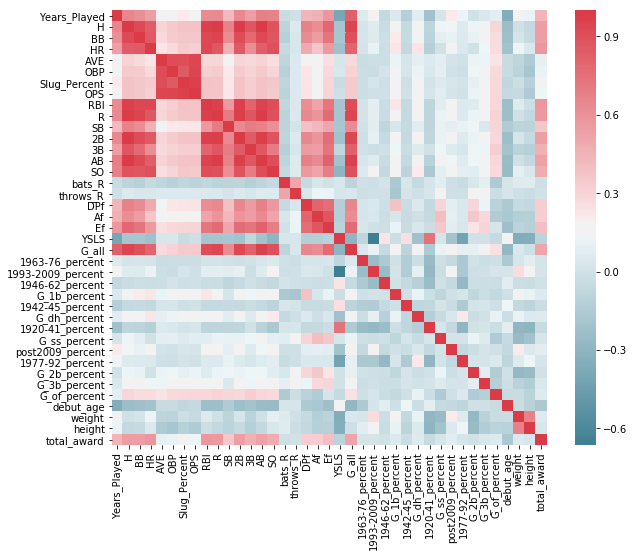

In [63]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [64]:
# saving back up of df
data_original = data.copy()

# multi-variate classification
performance:
- 0 award - ordinary players
- 1 awards - award winning players by chance/luck/odd
- 2-20 awards - good players
- 20+ awards - hall of fame players (potentially)

In [65]:
data = data_original.copy()

In [66]:
data.total_award[data.total_award < 1] =0
data.total_award[data.total_award.between(2,20, inclusive = True)] =1
data.total_award[data.total_award > 20] =2

/Users/wx3land/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/wx3land/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/wx3land/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imp

In [67]:
data.total_award.value_counts()

0.0    7898
1.0    1387
2.0     125
Name: total_award, dtype: int64

In [68]:
# logistic regression 
# Create `target` Series
target = data['total_award']

# Create `features` DataFrame
features = data.drop(['total_award'], axis=1)

In [69]:
# scale variables
features_scale = scale(features, axis=0, with_mean=True, with_std=True, copy=True)
features_scale = pd.DataFrame(features_scale, columns = features.columns)

/Users/wx3land/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [70]:
# testing and training set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)

In [71]:
# over sampling
X_train_over = X_train.assign(total_award = y_train)

X_train_0 = X_train_over[X_train_over.total_award == 0]
X_train_1 = X_train_over[X_train_over.total_award == 1]
X_train_2 = X_train_over[X_train_over.total_award == 2]

X_train_1_over = X_train_1.sample(len(X_train_0), replace=True)
X_train_2_over = X_train_2.sample(len(X_train_0), replace=True)

X_train_over = pd.concat([X_train_0, X_train_1_over,X_train_2_over], axis=0)

y_train = X_train_over.total_award

print('Random over-sampling:')
print(X_train_over.total_award.value_counts())

Random over-sampling:
2.0    5514
1.0    5514
0.0    5514
Name: total_award, dtype: int64


In [72]:
# drop response
X_train_over = X_train_over.drop(['total_award'], axis=1)
X_train = X_train_over

In [73]:
X_train.shape

(16542, 38)

In [74]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)
logreg = LogisticRegression(multi_class ='auto')
logreg.fit(X_train, y_train)

/Users/wx3land/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [75]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [76]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2080  289   15]
 [  75  264   62]
 [   0    9   29]]


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92      2384
         1.0       0.47      0.66      0.55       401
         2.0       0.27      0.76      0.40        38

   micro avg       0.84      0.84      0.84      2823
   macro avg       0.57      0.76      0.62      2823
weighted avg       0.89      0.84      0.86      2823



In [78]:
coefficients = pd.concat([pd.DataFrame(features.columns),pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)
coefficients

,0,0,1,2
0,Years_Played,-0.490416,-0.079872,0.607213
1,H,0.000205,-0.008537,0.005883
2,BB,0.001836,-0.000481,-0.003506
3,HR,-0.004724,-0.011899,0.002512
4,AVE,0.062368,0.079246,-0.599137
5,OBP,0.089011,-0.026282,-0.747654
6,Slug_Percent,0.105327,0.210283,-0.457512
7,OPS,0.194338,0.184001,-1.205167
8,RBI,-0.003301,-0.002277,0.005186
9,R,-0.005840,0.001092,0.015310


# Random Forest

In [79]:
# random forest cross validation for parameter tuning
param_grid = {
                 'max_features': [5, 9, 15],
                 'max_depth': [8, 13, 15]
             }

clf = RandomForestClassifier(n_estimators=100) #Initialize with whatever parameters you want to

grid_clf = GridSearchCV(clf, param_grid, cv=5)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [5, 9, 15], 'max_depth': [8, 13, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [80]:
grid_clf. best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [81]:
grid_clf. best_params_

{'max_depth': 15, 'max_features': 5}

In [82]:
# variables used
X_train.columns

Index(['Years_Played', 'H', 'BB', 'HR', 'AVE', 'OBP', 'Slug_Percent', 'OPS',
       'RBI', 'R', 'SB', '2B', '3B', 'AB', 'SO', 'bats_R', 'throws_R', 'DPf',
       'Af', 'Ef', 'YSLS', 'G_all', '1963-76_percent', '1993-2009_percent',
       '1946-62_percent', 'G_1b_percent', '1942-45_percent', 'G_dh_percent',
       '1920-41_percent', 'G_ss_percent', 'post2009_percent',
       '1977-92_percent', 'G_2b_percent', 'G_3b_percent', 'G_of_percent',
       'debut_age', 'weight', 'height'],
      dtype='object')

In [83]:
X_train = X_train[['Years_Played', 'H', 'BB', 'HR', 'AVE', 'OBP', 'Slug_Percent', 'OPS',
       'RBI', 'R', 'SB', '2B', '3B', 'AB', 'SO', 'DPf',
       'Af', 'Ef', 'YSLS', 'G_all', 'debut_age', 'weight', 'height']] #, 'bats_R', 'throws_R', 'first_aap'
X_test = X_test[['Years_Played', 'H', 'BB', 'HR', 'AVE', 'OBP', 'Slug_Percent', 'OPS',
       'RBI', 'R', 'SB', '2B', '3B', 'AB', 'SO', 'DPf',
       'Af', 'Ef', 'YSLS', 'G_all', 'debut_age', 'weight', 'height']] # , 'bats_R', 'throws_R', 'first_aap'

In [84]:
print(len(X_train.columns))
print(X_train.columns)

23
Index(['Years_Played', 'H', 'BB', 'HR', 'AVE', 'OBP', 'Slug_Percent', 'OPS',
       'RBI', 'R', 'SB', '2B', '3B', 'AB', 'SO', 'DPf', 'Af', 'Ef', 'YSLS',
       'G_all', 'debut_age', 'weight', 'height'],
      dtype='object')


In [85]:
#X_train.to_csv('X_train.csv',index = False)
#y_train.to_csv('y_train.csv', index = False)
#X_test.to_csv('X_test.csv', index = False)
#y_test.to_csv('y_test.csv', index = False)

In [86]:
param_grid = {
                 'max_features': [5, 9, 13],
                 'max_depth': [13, 16, 19]
             }

from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(n_estimators=100) #Initialize with whatever parameters you want to

grid_clf = GridSearchCV(clf, param_grid, cv=3)
grid_clf.fit(X_train, y_train)

grid_clf. best_params_

{'max_depth': 19, 'max_features': 5}

In [87]:
# Random Forest - multi class - using CV parameters

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=3000, max_depth = 19, max_features = 5)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [88]:
# recall precision f1
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95      2384
         1.0       0.64      0.77      0.70       401
         2.0       0.80      0.53      0.63        38

   micro avg       0.91      0.91      0.91      2823
   macro avg       0.80      0.74      0.76      2823
weighted avg       0.91      0.91      0.91      2823



In [89]:
print('Accuracy of random forest classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.91


In [90]:
# important variables
importances = clf.feature_importances_

coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(importances))], axis = 1)
coefficients.columns = ['variable_name','importance']
coefficients= coefficients.sort_values(by=['importance'], ascending = False)
coefficients

,variable_name,importance
0,Years_Played,0.166261
19,G_all,0.114071
16,Af,0.079004
9,R,0.071586
1,H,0.067873
14,SO,0.053953
13,AB,0.049196
8,RBI,0.046150
7,OPS,0.043977
15,DPf,0.042694


# predicting 2000 - 2017

In [91]:
# predicting players from 2000 - 2017 using random forest
# keeping players between 1920 to 2000
df__20002017 = df_original.copy()
df__20002017 = df__20002017[df__20002017.debutYear.between(2001, 2017, inclusive = True)]

In [92]:
df__20002017.shape

(3758, 106)

In [93]:
df_20002017 = df__20002017[['Years_Played', 'H', 'BB', 'HR', 'AVE', 'OBP', 'Slug_Percent', 'OPS',
       'RBI', 'R', 'SB', '2B', '3B', 'AB', 'SO', 'DPf',
       'Af', 'Ef', 'YSLS', 'G_all', 'debut_age', 'weight', 'height', 'debutYear', 'total_award']]

In [94]:
x = df_20002017.copy()
df_20002017 = df_20002017.dropna()

df_20002017.shape

(2962, 25)

In [95]:
df_20002017.columns

Index(['Years_Played', 'H', 'BB', 'HR', 'AVE', 'OBP', 'Slug_Percent', 'OPS',
       'RBI', 'R', 'SB', '2B', '3B', 'AB', 'SO', 'DPf', 'Af', 'Ef', 'YSLS',
       'G_all', 'debut_age', 'weight', 'height', 'debutYear', 'total_award'],
      dtype='object')

In [96]:
x_20002017 = df_20002017[['Years_Played', 'H', 'BB', 'HR', 'AVE', 'OBP', 'Slug_Percent', 'OPS',
       'RBI', 'R', 'SB', '2B', '3B', 'AB', 'SO', 'DPf',
       'Af', 'Ef', 'YSLS', 'G_all', 'debut_age', 'weight', 'height']]

In [97]:
y_20002017 = df_20002017[['total_award']]

y_20002017.total_award[y_20002017.total_award < 1] =0
y_20002017.total_award[y_20002017.total_award.between(2,20, inclusive = True)] =1
y_20002017.total_award[y_20002017.total_award > 20] =2

y_20002017.total_award.value_counts()

/Users/wx3land/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/wx3land/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


0.0    2568
1.0     391
2.0       3
Name: total_award, dtype: int64

In [106]:
yy_pred=clf.predict(x_20002017)
yy_pred = pd.DataFrame(yy_pred)
yy_pred.columns = ['total_award']
yy_pred.total_award.value_counts()

0.0    2766
1.0     196
Name: total_award, dtype: int64

In [109]:
print(classification_report(y_20002017, yy_pred.total_award))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      2568
         1.0       0.74      0.37      0.49       391
         2.0       0.00      0.00      0.00         3

   micro avg       0.90      0.90      0.90      2962
   macro avg       0.55      0.45      0.48      2962
weighted avg       0.89      0.90      0.88      2962



/Users/wx3land/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/wx3land/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/wx3land/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [139]:
# export best model result - three-class classification with random forest
from sklearn.metrics import classification_report
from  sklearn.metrics import precision_recall_fscore_support
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['avg / total'] = avg

    return class_report_df.T


In [144]:
df_class_report = pandas_classification_report(y_true=y_20002017, y_pred=yy_pred.total_award)
df_class_report.to_csv('../output/Award_RFClassificationReport_award_prediction.csv',  sep=',', index = False)

/Users/wx3land/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/wx3land/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
